In [1]:
pip install matplotlib

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [i for i in range(10)]
print(x)
y = [2*i for i in range(10)]
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


Text(0, 0.5, 'Y-label')

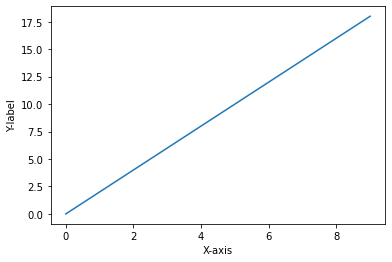

In [4]:
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-label')

<BarContainer object of 10 artists>

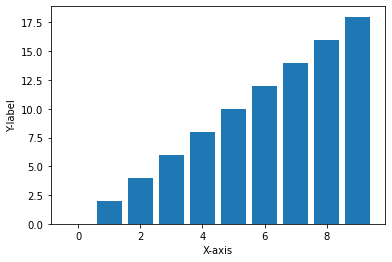

In [5]:
plt.xlabel('X-axis')
plt.ylabel('Y-label')
plt.bar(x, y)

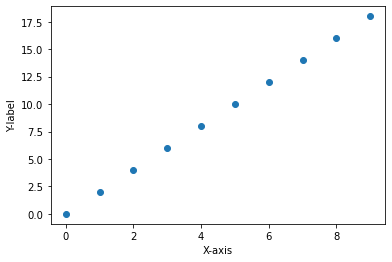

In [6]:
plt.xlabel('X-axis')
plt.ylabel('Y-label')
plt.scatter(x, y)

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
 
iris = datasets.load_iris()

x = iris.data
y = iris.target

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 4)
(150,)
(112, 4)
(38, 4)
(112,)
(38,)


In [8]:
import numpy as np
import pandas as pd
from sklearn import neighbors,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
x = data[['buying',
         'maint',
         'safety']].values
y = data[['class']]

print(x, y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [10]:
Le = LabelEncoder()
for i in range(len(x[0])):
    x[:, i] = Le.fit_transform(x[:, i])

print(x)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


In [11]:
label_maping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
y['class'] = y['class'].map(label_maping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


<ipython-input-11-2349f6cb3a2e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(label_maping)


In [12]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('predictions: ',prediction)
print('accuracy: ',accuracy)

D:\Softwares\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


predictions:  [1 1 0 1 0 1 0 0 2 0 0 3 1 2 0 0 0 0 0 1 0 2 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 3 0 0 0 0 0 0 0 0 0 0 1 2 1 1 3 0 0 1 3 0 1 1 0 0 1 0 0 0 0 0
 2 0 1 1 1 0 0 0 0 2 0 0 0 3 1 1 1 0 0 2 0 0 0 1 0 0 0 0 0 2 0 0 1 0 0 0 0
 0 0 0 0 0 1 3 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0
 0 0 0 0 1 0 2 1 0 0 0 3 0 0 0 0 1 0 3 1 0 1 0 0 0 0 1 0 2 1 2 3 0 1 0 0 0
 1 0 0 0 1 0 0 2 0 2 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 2 0 0 0 0
 1 1 0 3 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 2 0 3 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 2 0 1 1 1 0 0 0 0 0 1 0 3 1 0 0
 0 0 0 3 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 1 0 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0]
accuracy:  0.7341040462427746


In [ ]:
a = int(input('Index Value'))
print('actual value: ',y[a])
print('predicted value: ',knn.predict(x)[a])

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_iris()

x = iris.data
y = iris.target


classes = ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica']
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y)

model = svm.SVC()
model.fit(x_train, y_train)

print(model)

predictions = model.predict(x_test)
acc = accuracy_score(y_test, predictions)

print('Predictions: ',predictions)
print('actual: ',y_test)
print('accuracy: ',acc)


for i in range(len(predictions)):
    print(classes[predictions[i]])

In [ ]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()


x = boston.data
y = boston.target

print('x')
print(x)
print(x.shape)
print('y')
print(y)
print(y.shape)


In [ ]:
l_reg = linear_model.LinearRegression()

plt.scatter(x.T[5], y)

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = l_reg.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
print('Predictions: ', predictions)

In [ ]:
print('R^2 value: ', l_reg.score(x, y))

In [ ]:
print('coedd: ', l_reg.coef_)

In [ ]:
print('intercept: ', l_reg.intercept_)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [ ]:
bc = load_breast_cancer()
print(bc)


In [ ]:
x = scale(bc.data)
print(x)

In [ ]:
y = bc.target
print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=4)

model = KMeans(n_clusters=2, random_state=0)


In [ ]:
model.fit(x_train)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
labels = model.labels_

In [ ]:
print('labels: ', labels)
print('predictions: ',predictions)
print('accuracy: ', accuracy_score(y_test, predictions))
print('actual: ', y_test)